In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../omar/Data/test_st.csv')

In [3]:
df_train['value_created_at'] = pd.to_datetime(df_train['value_created_at'])

In [4]:
df_train.columns

Index(['value_created_at', 'measure_id', 'point_id', 'NGA', 'NGV', 'K',
       'VCC_g', 'VC_g'],
      dtype='object')

In [5]:
df_train.iloc[9]

value_created_at    2023-07-07 20:37:52
measure_id                     12870669
point_id                         232710
NGA                             0.03889
NGV                             2.90654
K                              3.047456
VCC_g                           0.29236
VC_g                            0.31516
Name: 9, dtype: object

In [6]:
df_nga = df_train[['value_created_at', 'NGA']]

In [7]:
df_nga.shape

(5704, 2)

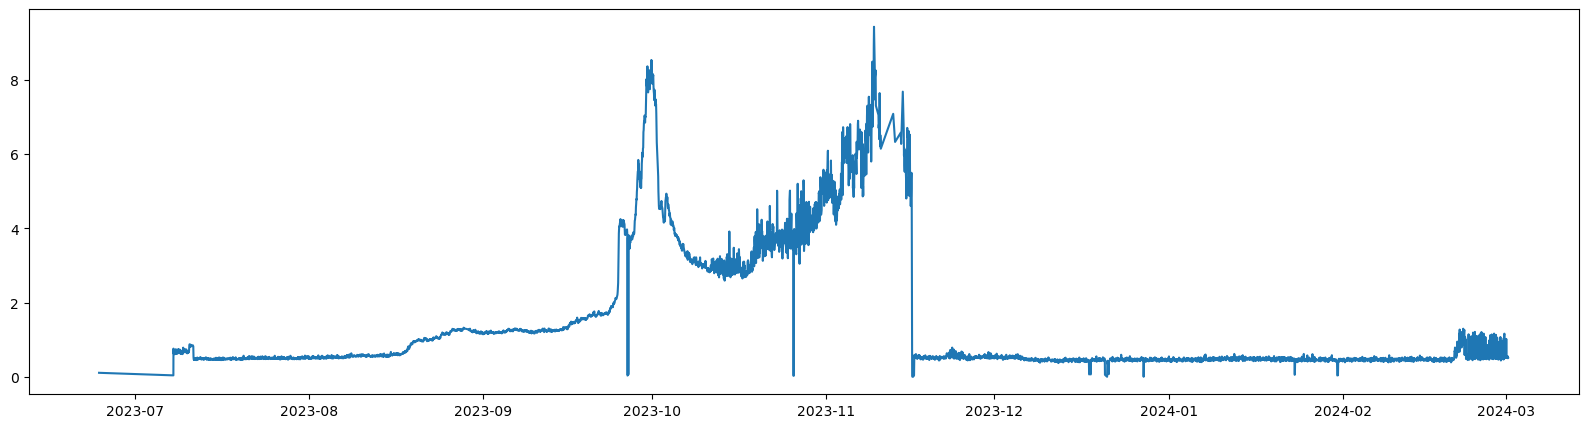

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df_nga['value_created_at'], df_nga['NGA']);

In [9]:
diff = df_nga['value_created_at'].iloc[1:].reset_index(drop=True)-df_nga['value_created_at'].iloc[:-1].reset_index(drop=True)
diff = diff.apply(lambda x : x.total_seconds())
diff

0       1023.0
1       1629.0
2        300.0
3        300.0
4        300.0
         ...  
5698    3600.0
5699    3600.0
5700    3600.0
5701    3600.0
5702    3600.0
Name: value_created_at, Length: 5703, dtype: float64

In [10]:
diff.argmax()

8

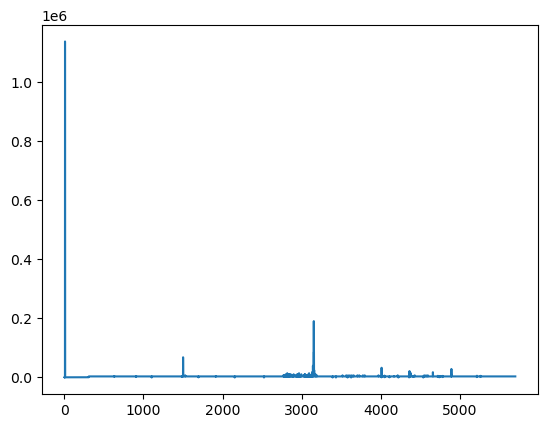

In [11]:
plt.plot(diff);

In [12]:
(diff.sort_values(ascending=False)/(3600)).head(135)

8       316.131111
3154     53.000000
3156     24.000000
1501     19.000000
3143     11.000000
           ...    
4360      1.033333
3174      1.011389
4896      1.005000
3774      1.000000
3778      1.000000
Name: value_created_at, Length: 135, dtype: float64

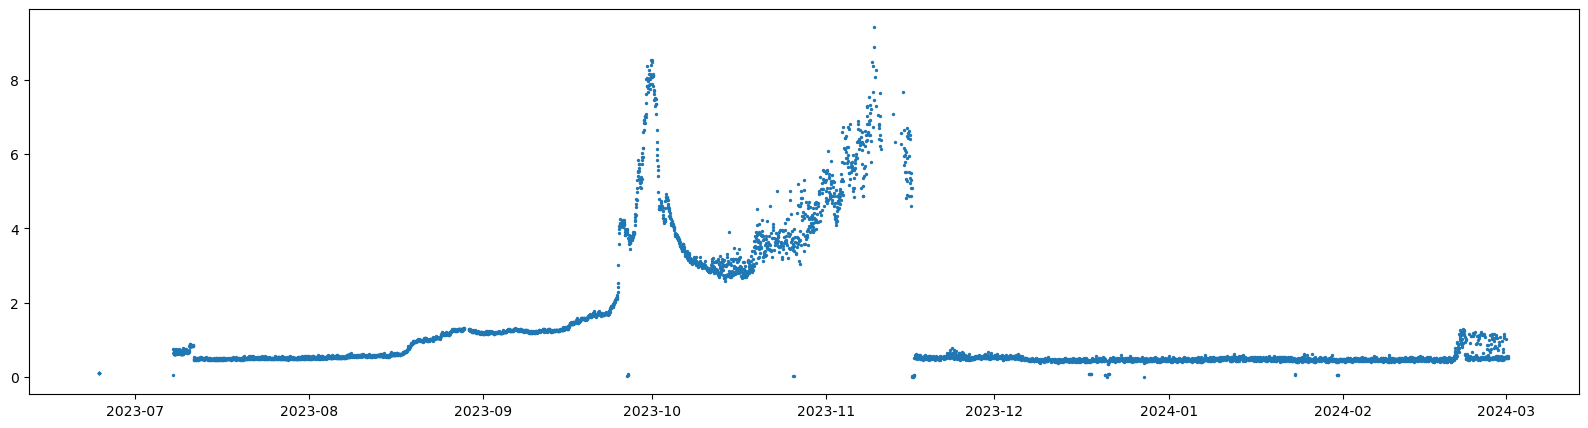

In [13]:
fig, ax = plt.subplots(figsize = (20, 5))
plt.scatter(x=df_nga["value_created_at"], y=df_nga["NGA"], s=2);

In [35]:
import matplotlib.pyplot as plt
import ruptures as rpt

In [47]:
signal = df_nga["NGA"].values

In [48]:
# detection
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=2*np.log(len(signal)))

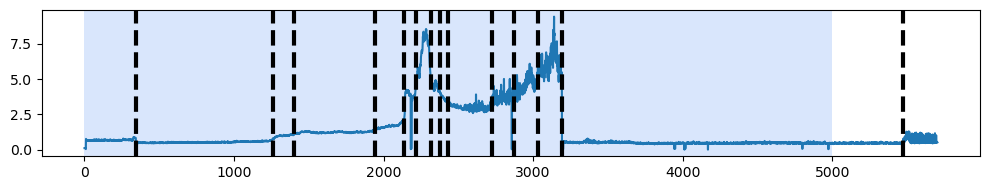

In [49]:
# display
rpt.display(signal, [5000], result)
plt.show()